In [1]:
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Mouse C3KO-RichLi snRNA
####  2023-05-18 by Yi Zhao (Texas Heart Institute, US)
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Initiate  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
Ver <- '0'
Step <- 'PART12_Annotation_Fibro'
Project <- '2023_neoc3ko_rli'

Code_dir <- paste0('/Volumes/shire/project/', Project, '/code/mouse_v', Ver, '/')

source(Sys.readlink(paste0(Code_dir, 'src/bioinformatics.R')))
source(Sys.readlink(paste0(Code_dir, 'src/scRNAseq.R')))
source(Sys.readlink(paste0(Code_dir, 'src/scATACseq.R')))
source(paste0(Code_dir, 'mouse_v', Ver, '.helper_functions.R'))

InitiateProject('Rivendell', Ver, Step, 'mouse', Project, 'shire')

In [2]:
plan("multisession", workers = 8)
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Load data  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
srt <- readRDS('integrated/PART10.annotated.srt.rds')
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Excitatory Neuron annotation  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
sub.srt <- srt[, srt$Cell_type %in% c('Fibroblast')]

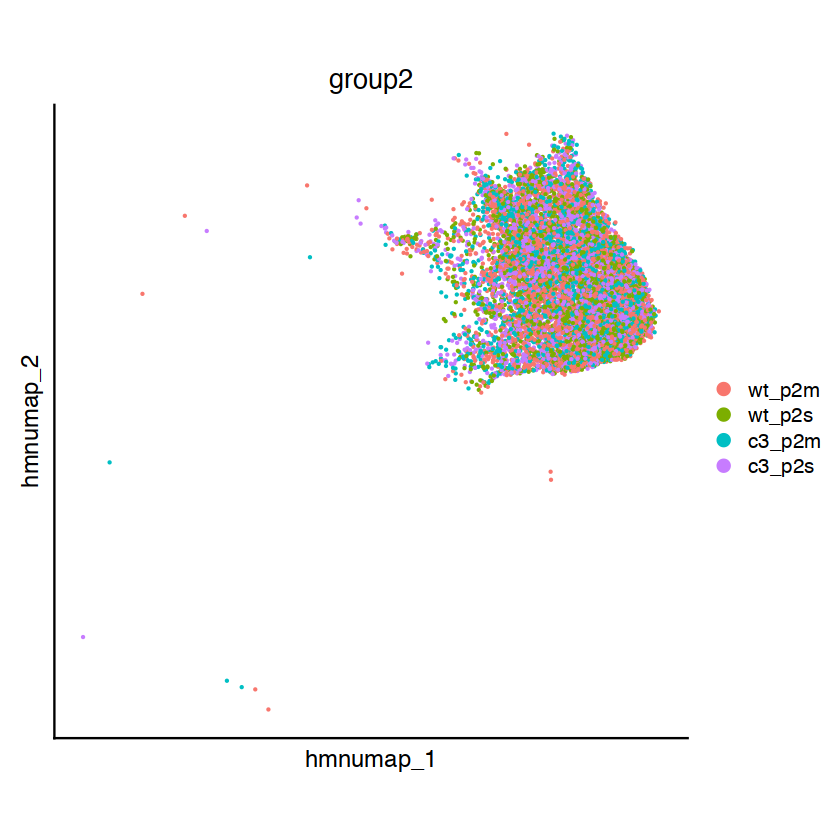

In [3]:
DimPlot2(sub.srt, group.by = 'group2')

In [53]:
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Global Functions  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
RunUMAP.my <- function(srt_obj, var.toal = 0.75, haromize.by, assay, dimN,...){
        srt.out <- FindVariableFeatures(srt_obj) |> ScaleData(vars.to.regress = c('nCount_RNA', 'nFeature_RNA', 'pct_mito_RNA'))
        srt.out <- RunPCA(srt.out, seed.use = 505, assay = assay)
#        dimN <- FindDimNumber(srt_obj = srt.out, var.toal = var.toal, reduction = 'pca')
        srt.out <- RunHarmony(srt.out, group.by.vars = haromize.by, assay.use = assay)
#        dimN <- FindDimNumber(srt_obj = srt.out, var.toal = var.toal, reduction = 'harmony')
        srt.out <- RunUMAP(srt.out, dims = 1:dimN, seed.use = 505, reduction = 'harmony',
                           reduction.name = 'sub_hmn_umap', reduction.key = 'subhmnumap_', ...)
        srt.out <- FindNeighbors(srt.out, reduction = "harmony", dims = 1:dimN) %>% FindClusters(resolution = seq(0.1, 1, 0.1), verbose = FALSE)
        return(srt.out)
}
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----

In [54]:
assay <- 'RNA'
sub.srt <- RunUMAP.my(sub.srt, assay = assay, dimN = 50, haromize.by = 'sample')


Regressing out nCount_RNA, nFeature_RNA, pct_mito_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  Rbm20, Ryr2, Mlip, Tnni3k, D830005E20Rik, Trdn, Fgf13, Trim55, Actn2, Gm31251 
	   Ldb3, Mhrt, Ttn, Rbm24, Fhod3, Cd36, Pkp2, Kcnn2, Kcng2, Nebl 
	   Lmo7, Myocd, Myo18b, Casq2, Mylk3, Ppp1r14c, Gja1, 4930512H18Rik, Ppargc1a, Obscn 
Negative:  Col1a2, Vav3, Pde1a, Col1a1, Pcsk6, Diaph3, Nrk, mt-Nd6, Morrbid, Col15a1 
	   Adamtsl3, Adamts5, Pid1, Chsy3, Mfap5, Sparc, Camk1d, C1qtnf7, Pcdh9, Mecom 
	   Aff3, Lepr, Gxylt2, Cep112, Rab3c, Neil3, Robo1, Abca8b, Depdc1a, Slit2 
PC_ 2 
Positive:  Col1a2, Cfh, Gm42418, Eln, Naaladl2, Slit3, Dapk1, Col1a1, Cpe, Magi2 
	   Sparc, Plxdc2, Phactr1, Esrrg, Apoe, Palld, Rgs6, Fmo2, Tmtc2, Tmtc1 
	   Prkn, Mgp, Fbn2, Tshz2, Plxna4, Gxylt2, Gas6, Foxp1, Adamts6, Lars2 
Negative:  Top2a, Knl1, Kif11, Prc1, Kif23, Diaph3, Mki67, Lockd, Ect2, Tpx2 
	   Neil3, Kif15, Kif4, Anln, Mis18bp1, Cenpe, Cenpa, Nusap1, Racgap1, Kif20b 
	   Cdca2, Ckap2, Depd

In [55]:
p <- list(
  DimPlot2(sub.srt, reduction = 'sub_hmn_umap', group.by = 'group2', raster = T, pt.size = 0.2),
  DimPlot2(sub.srt, reduction = 'sub_hmn_umap', group.by = 'Doublet_SC', raster = T, pt.size = 0.2),
  DimPlot2(sub.srt, reduction = 'sub_hmn_umap', group.by = 'Cell_type', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_hmn_umap', group.by = 'RNA_snn_res.0.1', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_hmn_umap', group.by = 'RNA_snn_res.0.2', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_hmn_umap', group.by = 'RNA_snn_res.0.3', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_hmn_umap', group.by = 'RNA_snn_res.0.4', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_hmn_umap', group.by = 'RNA_snn_res.0.5', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_hmn_umap', group.by = 'RNA_snn_res.0.6', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_hmn_umap', group.by = 'RNA_snn_res.0.7', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_hmn_umap', group.by = 'RNA_snn_res.0.8', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_hmn_umap', group.by = 'RNA_snn_res.0.9', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_hmn_umap', group.by = 'RNA_snn_res.1', raster = T, pt.size = 0.2, label = T)
)
p <- wrap_plots(p, nrow = 4)
PlotPDF('01.0.umap.clusters', 20, 20)
p
dev.off()

pdf 
  2

In [67]:
## Annotate
Idents(sub.srt) <- 'RNA_snn_res.0.2'
mk <- FindAllMarkers(sub.srt, only.pos = T, return.thresh = 0.01, logfc.threshold = 0.5)
mk <- mk[mk$p_val_adj < 0.01, ]
Table(mk$cluster)
p <- MarkerHeatmap(sub.srt, mk, n_cells = 500, top = 10)
PlotPDF('01.1.heat.marker_all_cluster', 15, 15)
p
dev.off()

PlotPDF('01.2.dim.all_cluster', 10, 10)
DimPlot2(sub.srt, reduction = 'sub_hmn_umap', label = T, cols = mycol_10)
dev.off()

PlotPDF('01.3.bar.doublet_in_all_cluster', 5, 5)
CountCellBarPlot(sub.srt, group.var = 'RNA_snn_res.0.2', stack.var = 'Doublet_SC', percentage = T)
dev.off()

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7




  0   1   2   3   4   5   6   7 
 58 152 311 117   1 405 431 232 

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


pdf 
  2

pdf 
  2

`summarise()` has grouped output by 'Doublet_SC'. You can override using the
`.groups` argument.


$plot

$data
# A tibble: 16 × 3
# Groups:   StackVar [2]
   StackVar GroupVar Count
   <lgl>    <fct>    <int>
 1 FALSE    0         2618
 2 FALSE    1         1780
 3 FALSE    2         1690
 4 FALSE    3         1644
 5 FALSE    4          809
 6 FALSE    5          652
 7 FALSE    6           77
 8 FALSE    7           44
 9 TRUE     0           25
10 TRUE     1           29
11 TRUE     2           32
12 TRUE     3           41
13 TRUE     4            9
14 TRUE     5           27
15 TRUE     6          147
16 TRUE     7           39


pdf 
  2

In [63]:
gl <- Table(srt$Cell_type)
p <- FeaturePlot2(sub.srt, features = paste0('Score_', names(gl)), raster = T, min.cutoff = 0, max.cutoff = 4, ncol = 5)
PlotPDF('01.4.feat.cell_type_score', 30, 20)
p
dev.off()

Warning message in FetchData.Seurat(object = object, vars = c(dims, "ident", features), :
"The following requested variables were not found: Score_Doublet"
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will 

pdf 
  2

Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
"The following requested variables were not found: Score_Doublet"


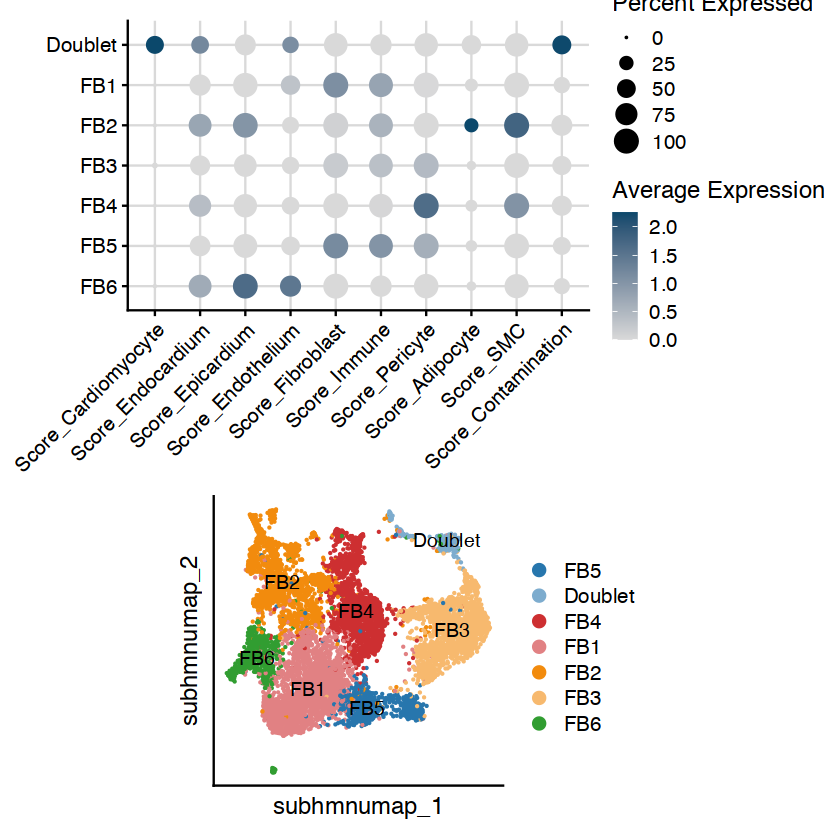

In [69]:
## Re-annotate
sub.srt$Cell_state <- NA

sub.srt$Cell_state[sub.srt$RNA_snn_res.0.2 %in% c(0)] <- 'FB1'
sub.srt$Cell_state[sub.srt$RNA_snn_res.0.2 %in% c(1)] <- 'FB2'
sub.srt$Cell_state[sub.srt$RNA_snn_res.0.2 %in% c(2)] <- 'FB3'
sub.srt$Cell_state[sub.srt$RNA_snn_res.0.2 %in% c(3)] <- 'FB4'
sub.srt$Cell_state[sub.srt$RNA_snn_res.0.2 %in% c(4)] <- 'FB5'
sub.srt$Cell_state[sub.srt$RNA_snn_res.0.2 %in% c(5)] <- 'FB6'
sub.srt$Cell_state[sub.srt$RNA_snn_res.0.2 %in% c(6, 7)] <- 'Doublet'



Idents(sub.srt) <- 'Cell_state'
DotPlot2(sub.srt, features = paste0('Score_', levels(sub.srt$Cell_type)), group.by = 'Cell_state', col.min = 0) /
        DimPlot2(sub.srt, reduction = 'sub_hmn_umap', label = T, cols = mycol_20)

In [70]:
## Re-embed without ambiguous cells
sub.srt2 <- sub.srt
sub.srt2 <- sub.srt2[, sub.srt2$Cell_state != 'Doublet']
sub.srt2 <- RunUMAP(sub.srt2, reduction = 'harmony', dims = 1:50, min.dist = 0.5,
                   reduction.name = 'sub_clean_hmn_umap', reduction.key = 'subcleanHMNUMAP_', verbose = FALSE)
sub.srt@reductions$sub_clean_hmn_umap <- sub.srt@reductions$sub_hmn_umap
sub.srt@reductions$sub_clean_hmn_umap@cell.embeddings[, c(1,2)] <- NA
sub.srt@reductions$sub_clean_hmn_umap@cell.embeddings[Cells(sub.srt2), c(1,2)] <-
        sub.srt2@reductions$sub_clean_hmn_umap@cell.embeddings
colnames(sub.srt@reductions$sub_clean_hmn_umap@cell.embeddings) <-
        colnames(sub.srt2@reductions$sub_clean_hmn_umap@cell.embeddings)
sub.srt@reductions$sub_clean_hmn_umap@key <- sub.srt2@reductions$sub_clean_hmn_umap@key
PlotPDF('04.umap.Re_embed_annotated_reembed', 6, 6)
DimPlot2(sub.srt, reduction = 'sub_clean_hmn_umap', group.by = 'Cell_state', cols = mycol_10,  label = T)
dev.off()

Warning message:
"Removed 307 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_text()`)."


pdf 
  2

In [17]:
saveRDS(sub.srt, 'integrated/PART12.Fibroblast_cells_anno.srt.rds')

In [33]:
PlotPDF('06.1.dotplot.c3', 12, 12)
p1 <- DotPlot2(sub.srt[, !sub.srt$RNA_snn_res.1 %in% c(16,18)], features = c('C3','Upk3b','Col1a1'),group.by = 'RNA_snn_res.1',split.by = 'genotype',cols = 'RdYlBu')
p2 <- DotPlot2(sub.srt, features = c('C3','Upk3b','Col1a1'),group.by = 'RNA_snn_res.1',split.by = 'genotype',cols = 'RdYlBu')
p1 | p2
dev.off()

pdf 
  2

In [34]:
PlotPDF('06.2.vlnplot.c3', 12, 12)
VlnPlot2(sub.srt, features = c('C3','Upk3b','Col1a1'),group.by = 'RNA_snn_res.1',split.by = 'genotype', ncol = 2)
dev.off()

pdf 
  2

In [39]:
Table(sub.srt$genotype)


C3KO   WT 
4461 5202 

In [42]:
PlotPDF('06.3.featurescatter.c3', 12, 6)
p1 <- FeatureScatter(sub.srt[, sub.srt$genotype %in% c('C3KO')], feature1 = 'C3', feature2 = 'Upk3b')
p2 <- FeatureScatter(sub.srt[, sub.srt$genotype %in% c('WT')], feature1 = 'C3', feature2 = 'Upk3b')
p1 | p2
dev.off()

pdf 
  2

In [41]:
PlotPDF('06.3.featurescatter.c3', 12, 6)
p1 <- FeatureScatter(sub.srt, feature1 = 'C3', feature2 = 'Upk3b')
p2 <- FeatureScatter(object = sub.srt, feature1 = 'C3', feature2 = 'Col1a1')
p1 | p2
dev.off()

pdf 
  2